In [1]:
#Import all the necessary modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split

### Load the dataset

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
park_df = pd.read_csv(url)

###  It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. 

In [3]:
#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [4]:
park_df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
park_df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [6]:
park_df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
park_df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
park_df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

### Standardization of Data (Use Standard Scaler)

In [9]:
park_str_df = park_df['name']
park_num_df = park_df.drop('name',axis=1)

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(park_num_df)
park_sc_df = pd.DataFrame(scaled_data, index=park_num_df.index, columns=park_num_df.columns)
park_sc_df.head(10)

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.607532,-0.067893,-0.193225,0.571429,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.548254,-0.137843,-0.634508,0.571429,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,1.175323,-0.291633,-0.279760,0.571429,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,1.340229,-0.280719,-0.281346,0.571429,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.899461,-0.178026,-0.506745,0.571429,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082
5,-0.815735,-0.722609,-0.058458,0.715418,1.037674,0.447135,1.473037,0.445927,0.919842,0.893875,...,0.752360,-0.313213,-0.115072,0.571429,-0.800305,1.938081,1.325656,0.872692,-0.508795,1.682354
6,-0.822638,-0.655962,-0.034661,-0.597735,-0.401899,-0.593351,-0.518319,-0.592304,-0.724625,-0.731832,...,-0.777548,-0.465763,0.679600,0.571429,0.940483,0.833662,0.046050,0.374697,-1.380353,0.057898
7,-1.135957,-0.912426,-0.276658,-0.686658,-0.401899,-0.630511,-0.590996,-0.631716,-0.746424,-0.762700,...,-0.728175,-0.531000,1.134021,0.571429,1.339616,0.818262,-0.444365,-0.514347,-0.830591,-0.476111
8,-1.416988,-0.712681,-0.566017,-0.146921,0.461845,-0.127159,-0.045917,-0.126113,-0.466763,-0.469455,...,-0.487563,-0.350916,-0.016758,0.571429,1.128677,1.005330,0.170790,1.217174,-0.155350,0.278339
9,-1.433314,-0.843795,-0.578181,-0.186212,0.461845,-0.211614,-0.045917,-0.212820,-0.070666,-0.140198,...,-0.123519,-0.362823,-0.005431,0.571429,0.467823,1.456033,0.618459,1.195861,0.133483,0.721013


### Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?

#### Measures of Central Tendency - Mean, Median, Mode, Min, Max
#### Measures of Dispersion - Range, Variance, Standard Deviation, Correlation, Skewness and Kurtosis

In [11]:
#Count, Mean, Standard Deviation, Min, Q1, Q2, Q3, Max
park_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [12]:
#Median
park_num_df.median()

MDVP:Fo(Hz)         148.790000
MDVP:Fhi(Hz)        175.829000
MDVP:Flo(Hz)        104.315000
MDVP:Jitter(%)        0.004940
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.002500
MDVP:PPQ              0.002690
Jitter:DDP            0.007490
MDVP:Shimmer          0.022970
MDVP:Shimmer(dB)      0.221000
Shimmer:APQ3          0.012790
Shimmer:APQ5          0.013470
MDVP:APQ              0.018260
Shimmer:DDA           0.038360
NHR                   0.011660
HNR                  22.085000
status                1.000000
RPDE                  0.495954
DFA                   0.722254
spread1              -5.720868
spread2               0.218885
D2                    2.361532
PPE                   0.194052
dtype: float64

In [13]:
#Mode
park_num_df['status'].mode()

0    1
dtype: int64

In [14]:
#Correlation
park_sc_df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [15]:
#Highly -ve to highly +ve correlation
park_sc_df.corr().unstack().sort_values().drop_duplicates()

HNR               MDVP:Shimmer       -0.835271
MDVP:Shimmer(dB)  HNR                -0.827805
Shimmer:DDA       HNR                -0.827130
HNR               Shimmer:APQ3       -0.827123
Shimmer:APQ5      HNR                -0.813753
HNR               MDVP:APQ           -0.800407
                  MDVP:PPQ           -0.731510
MDVP:Jitter(%)    HNR                -0.728165
MDVP:RAP          HNR                -0.721543
HNR               Jitter:DDP         -0.721494
NHR               HNR                -0.714072
HNR               PPE                -0.692876
                  spread1            -0.673210
MDVP:Jitter(Abs)  HNR                -0.656810
HNR               D2                 -0.601401
                  RPDE               -0.598736
DFA               MDVP:Fo(Hz)        -0.446013
HNR               spread2            -0.431564
spread1           MDVP:Fo(Hz)        -0.413738
MDVP:Flo(Hz)      RPDE               -0.400143
                  spread1            -0.394857
RPDE         

In [16]:
#Range
park_num_df.max()-park_num_df.min()

MDVP:Fo(Hz)         171.772000
MDVP:Fhi(Hz)        489.885000
MDVP:Flo(Hz)        173.694000
MDVP:Jitter(%)        0.031480
MDVP:Jitter(Abs)      0.000253
MDVP:RAP              0.020760
MDVP:PPQ              0.018660
Jitter:DDP            0.062290
MDVP:Shimmer          0.109540
MDVP:Shimmer(dB)      1.217000
Shimmer:APQ3          0.051920
Shimmer:APQ5          0.073700
MDVP:APQ              0.130590
Shimmer:DDA           0.155780
NHR                   0.314170
HNR                  24.606000
status                1.000000
RPDE                  0.428581
DFA                   0.251006
spread1               5.530953
spread2               0.444219
D2                    2.247868
PPE                   0.482828
dtype: float64

In [17]:
#Variance
park_num_df.var()

MDVP:Fo(Hz)         1.713137e+03
MDVP:Fhi(Hz)        8.370703e+03
MDVP:Flo(Hz)        1.894113e+03
MDVP:Jitter(%)      2.350440e-05
MDVP:Jitter(Abs)    1.212565e-09
MDVP:RAP            8.807685e-06
MDVP:PPQ            7.611952e-06
Jitter:DDP          7.926954e-05
MDVP:Shimmer        3.555839e-04
MDVP:Shimmer(dB)    3.797716e-02
Shimmer:APQ3        1.030867e-04
Shimmer:APQ5        1.445695e-04
MDVP:APQ            2.871919e-04
Shimmer:DDA         9.277580e-04
NHR                 1.633651e-03
HNR                 1.958739e+01
status              1.865186e-01
RPDE                1.080388e-02
DFA                 3.062054e-03
spread1             1.188553e+00
spread2             6.956521e-03
D2                  1.465351e-01
PPE                 8.121492e-03
dtype: float64

In [18]:
#Skewness - parameter to measure the symmetry of a data set
park_num_df.skew().sort_values()

status             -1.187727
HNR                -0.514317
RPDE               -0.143402
DFA                -0.033214
spread2             0.144430
D2                  0.430384
spread1             0.432139
MDVP:Fo(Hz)         0.591737
PPE                 0.797491
MDVP:Flo(Hz)        1.217350
Shimmer:APQ3        1.580576
Shimmer:DDA         1.580618
MDVP:Shimmer        1.666480
Shimmer:APQ5        1.798697
MDVP:Shimmer(dB)    1.999389
MDVP:Fhi(Hz)        2.542146
MDVP:APQ            2.618047
MDVP:Jitter(Abs)    2.649071
MDVP:PPQ            3.073892
MDVP:Jitter(%)      3.084946
MDVP:RAP            3.360708
Jitter:DDP          3.362058
NHR                 4.220709
dtype: float64

In [19]:
#Kurtosis - to measure how heavy its tails are compared to a normal distribution
park_num_df.kurt().sort_values()

RPDE                -0.921781
DFA                 -0.686152
MDVP:Fo(Hz)         -0.627898
status              -0.595518
spread2             -0.083023
spread1             -0.050199
D2                   0.220334
PPE                  0.528335
HNR                  0.616036
MDVP:Flo(Hz)         0.654615
Shimmer:APQ3         2.720152
Shimmer:DDA          2.720661
MDVP:Shimmer         3.238308
Shimmer:APQ5         3.874210
MDVP:Shimmer(dB)     5.128193
MDVP:Fhi(Hz)         7.627241
MDVP:Jitter(Abs)    10.869043
MDVP:APQ            11.163288
MDVP:PPQ            11.963922
MDVP:Jitter(%)      12.030939
MDVP:RAP            14.213798
Jitter:DDP          14.224762
NHR                 21.994974
dtype: float64

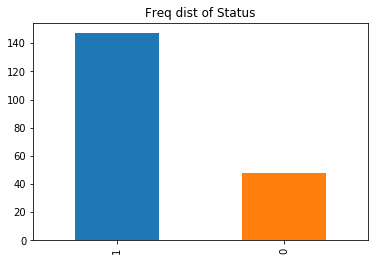

In [20]:
park_df['status'].value_counts().plot.bar(title="Freq dist of Status")

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


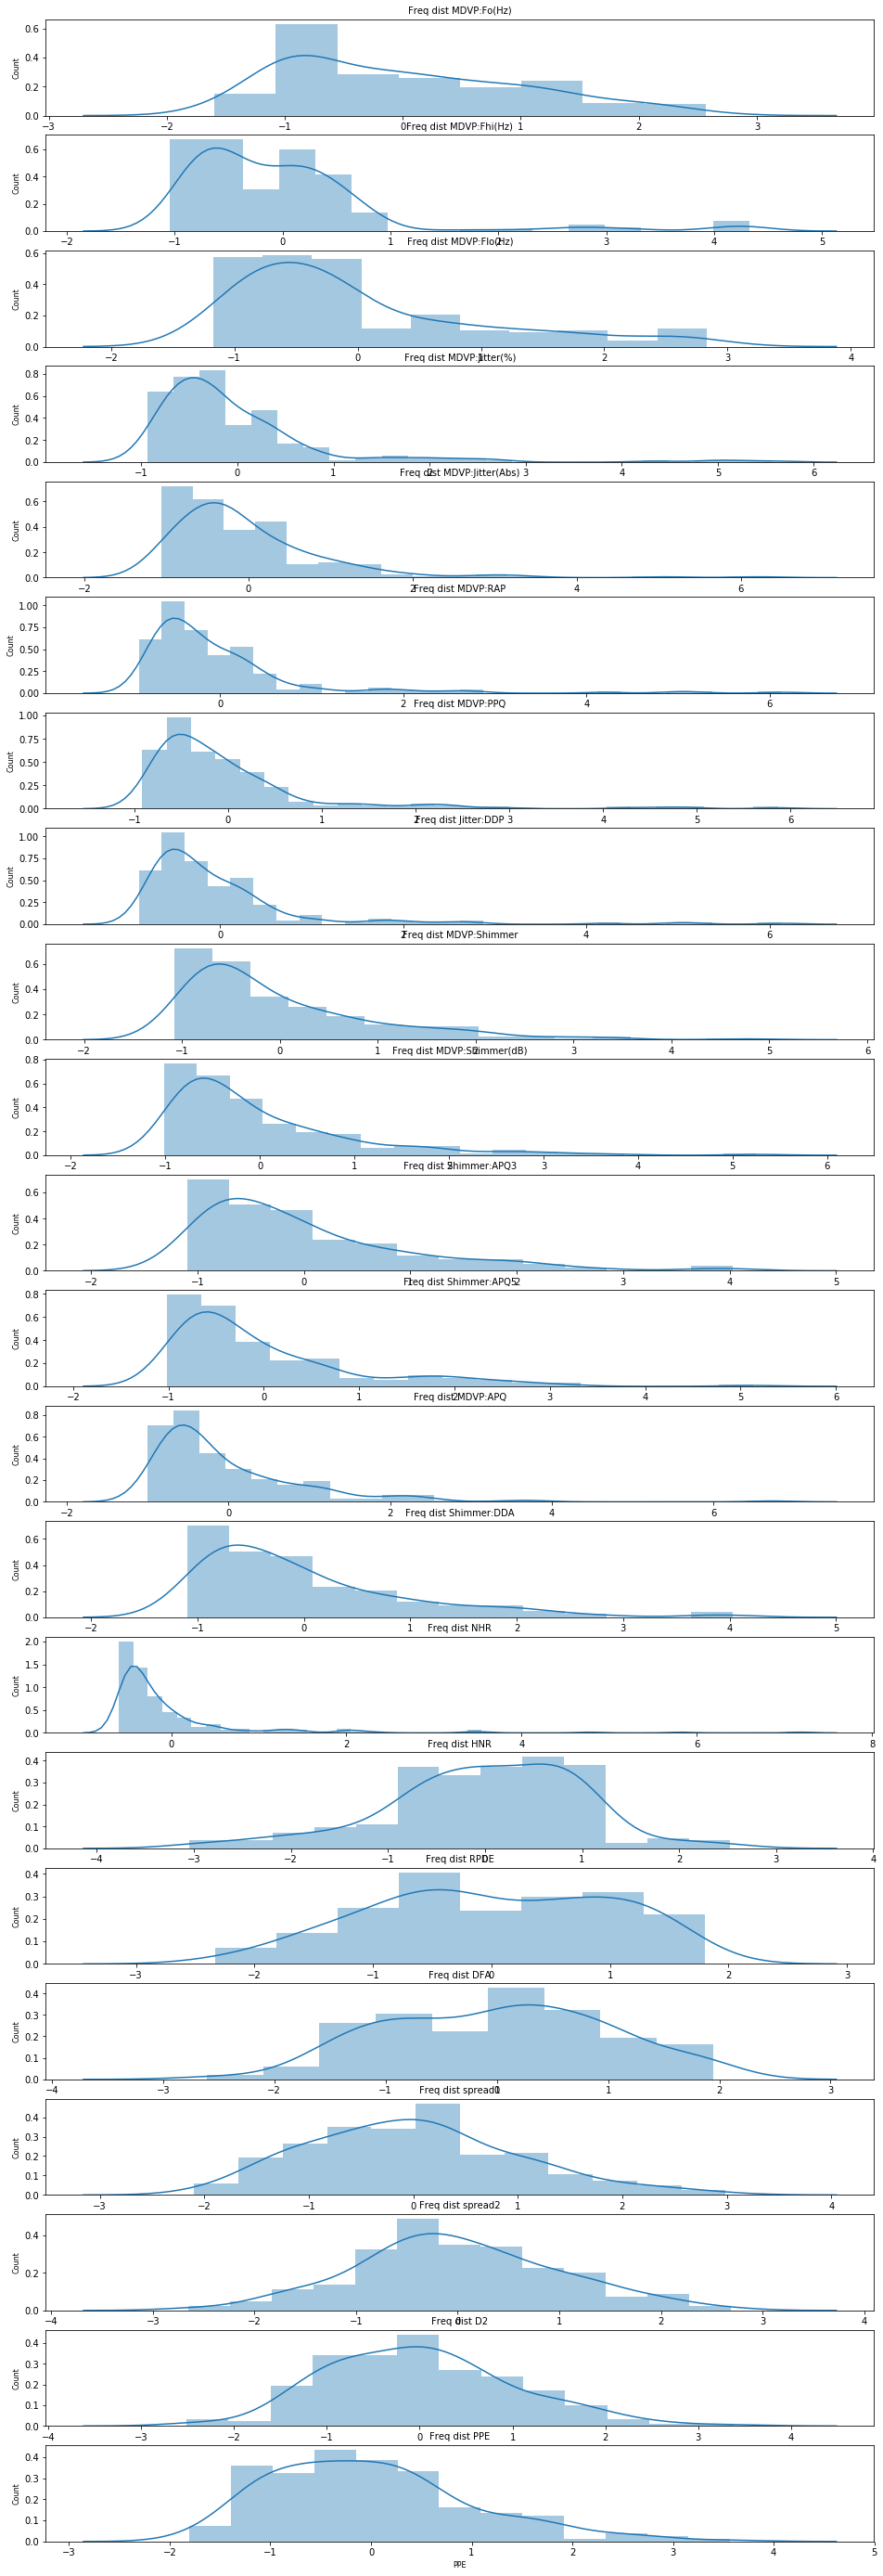

In [21]:
col_names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)',
             'MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5',
             'MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']

fig, ax = plt.subplots(len(col_names), figsize=(16,50))

for i, col_val in enumerate(col_names):

    sns.distplot(park_sc_df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

#Observation: 

#Attributes showing negative skewness (left skewed /left tailed) - HNR, RPDE, DFA

#Attributes showing high positive skewness (right skewed /right tailed) - MDVP:Flo(Hz), Shimmer:APQ3, Shimmer:DDA, 
#           MDVP:Shimmer, Shimmer:APQ5, MDVP:Shimmer(dB), MDVP:Fhi(Hz), MDVP:APQ, MDVP:Jitter(Abs), MDVP:PPQ, 
#           MDVP:Jitter(%), MDVP:RAP, Jitter:DDP, NHR

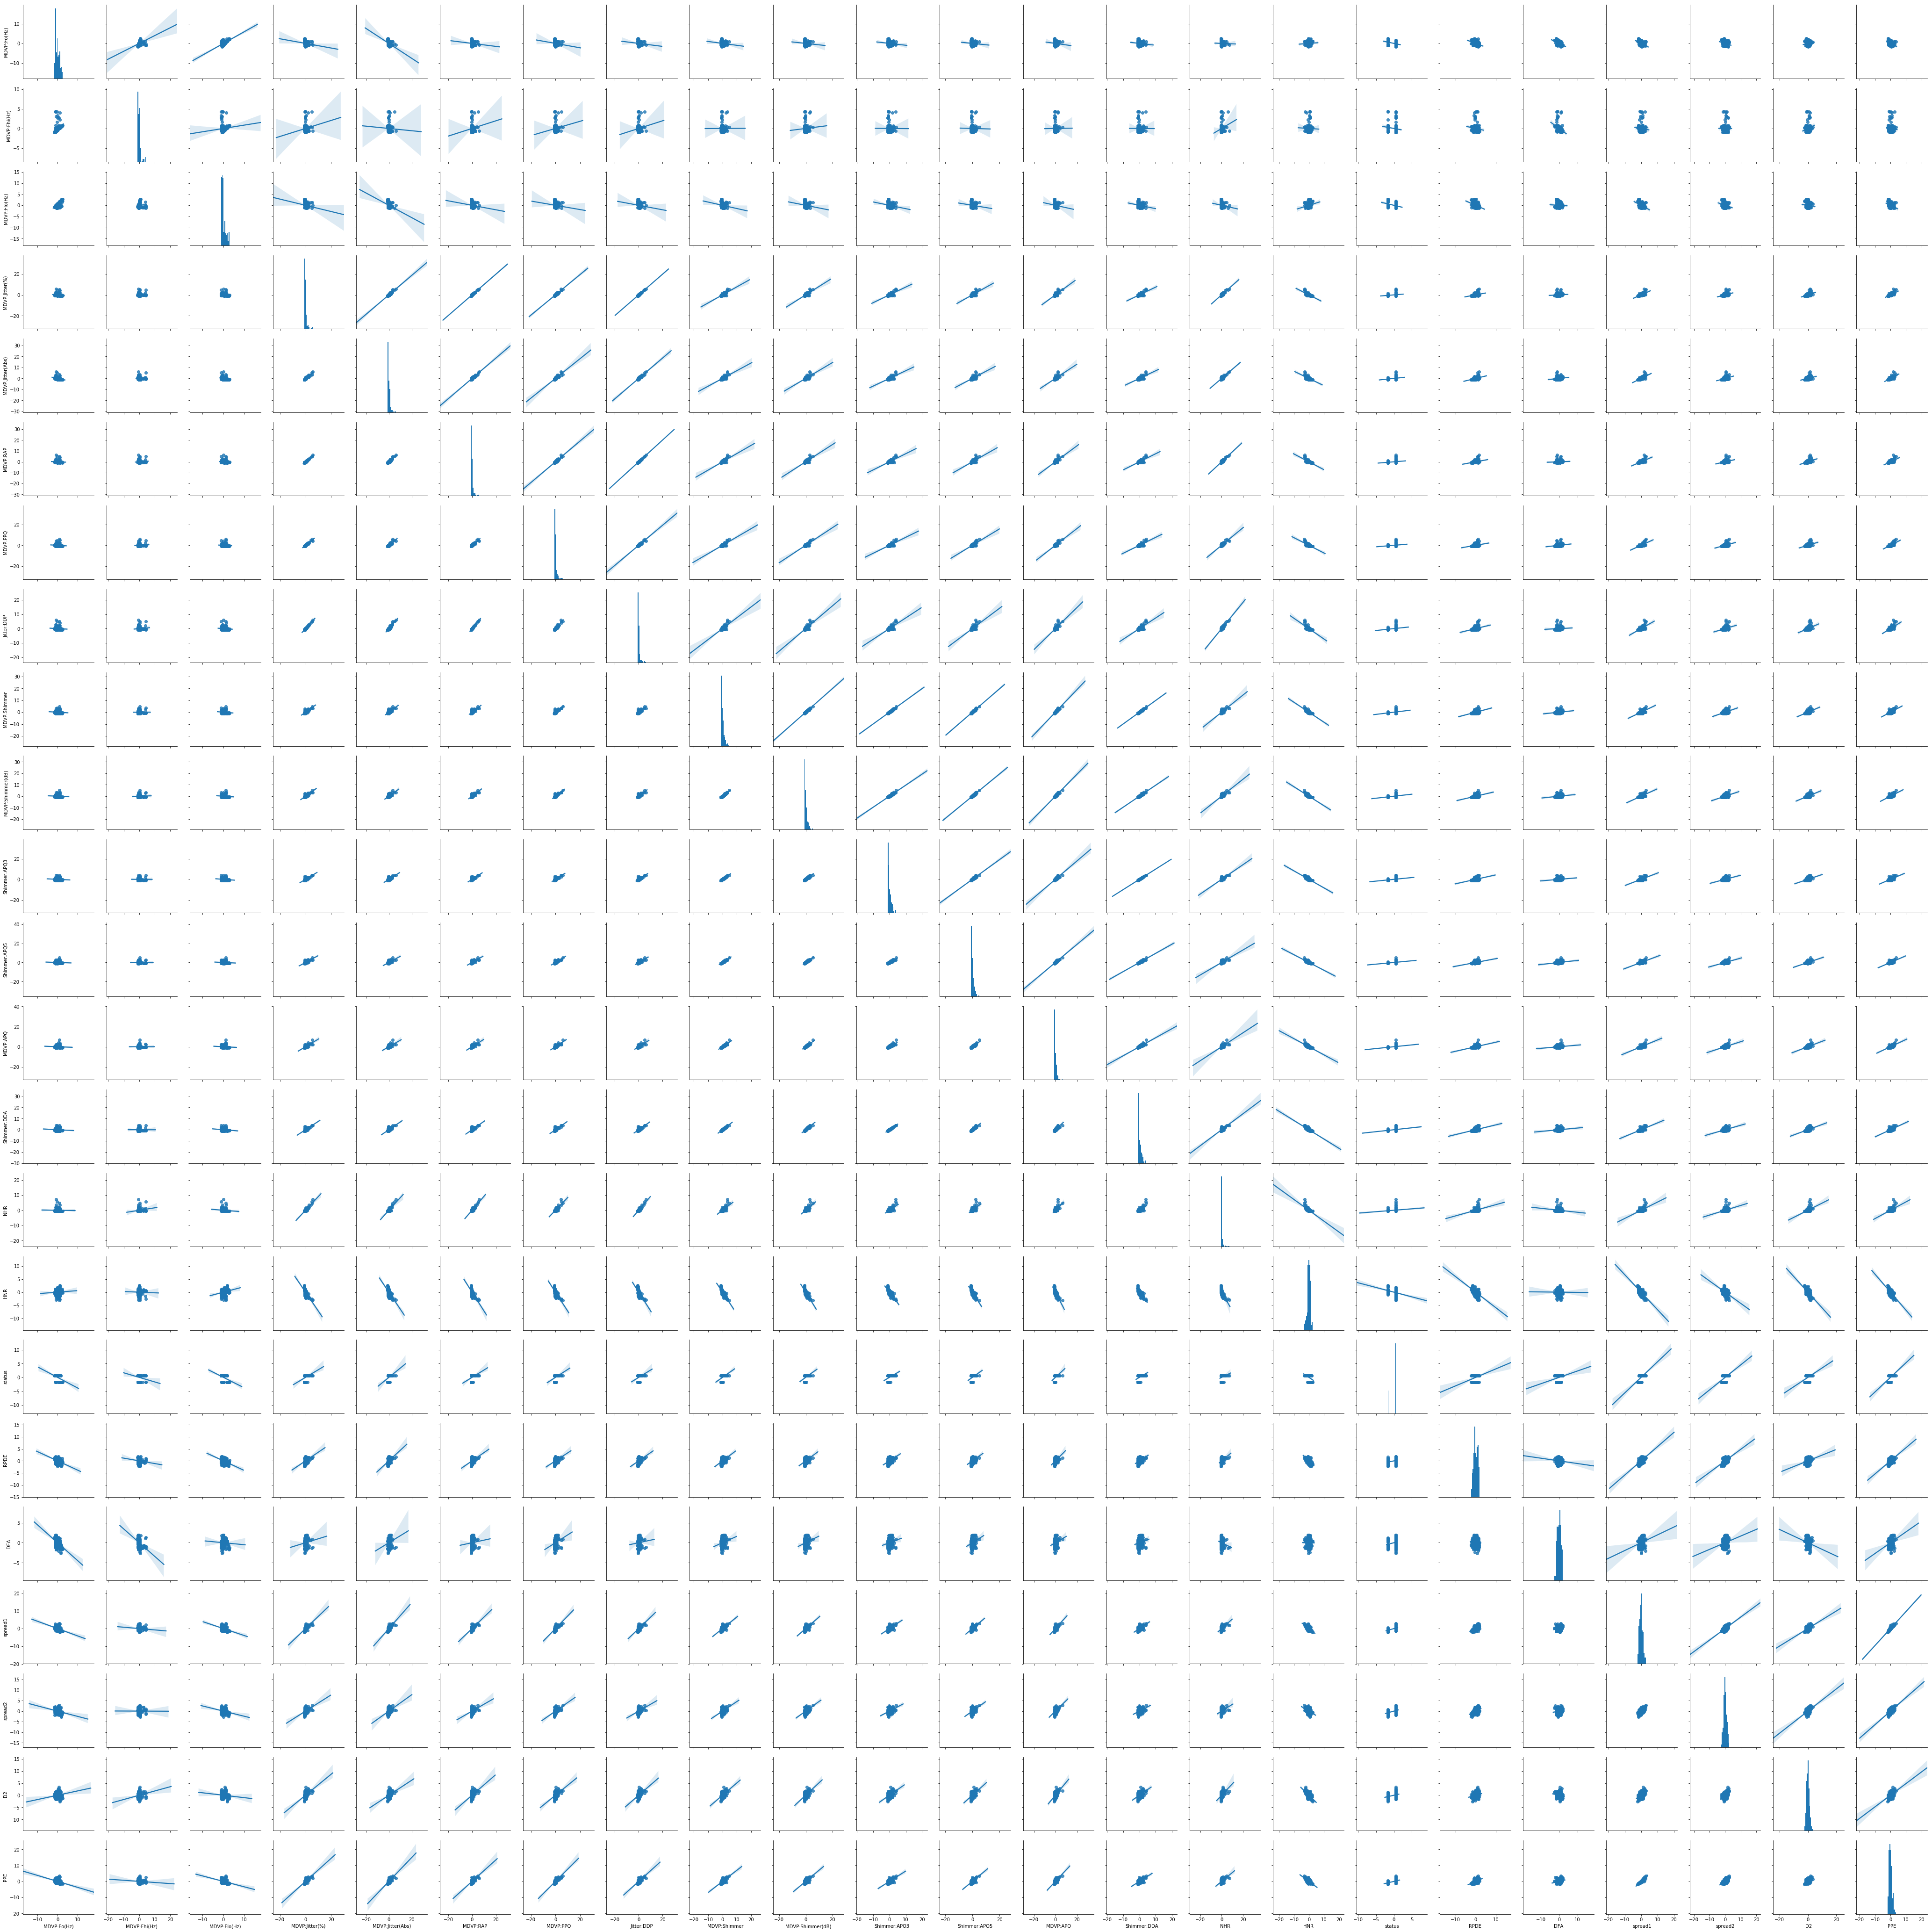

In [22]:
sns.pairplot(park_sc_df, kind="reg")

#Observations:

#Attributes showing -ve and +ve correlation -

#HNR               MDVP:Shimmer       -0.835271
#MDVP:Shimmer(dB)  HNR                -0.827805
#Shimmer:DDA       HNR                -0.827130
#HNR               Shimmer:APQ3       -0.827123
#Shimmer:APQ5      HNR                -0.813753
#HNR               MDVP:APQ           -0.800407
#                  MDVP:PPQ           -0.731510
#MDVP:Jitter(%)    HNR                -0.728165
#MDVP:RAP          HNR                -0.721543
#HNR               Jitter:DDP         -0.721494
#NHR               HNR                -0.714072
#HNR               PPE                -0.692876
#                  spread1            -0.673210
#MDVP:Jitter(Abs)  HNR                -0.656810
#HNR               D2                 -0.601401
#                  RPDE               -0.598736
#DFA               MDVP:Fo(Hz)        -0.446013
#HNR               spread2            -0.431564
#spread1           MDVP:Fo(Hz)        -0.413738
#MDVP:Flo(Hz)      RPDE               -0.400143
#                  spread1            -0.394857
#RPDE              MDVP:Fo(Hz)        -0.383894
#status            MDVP:Fo(Hz)        -0.383535
#MDVP:Jitter(Abs)  MDVP:Fo(Hz)        -0.382027
#status            MDVP:Flo(Hz)       -0.380200
#MDVP:Fo(Hz)       PPE                -0.372356
#HNR               status             -0.361515
#DFA               MDVP:Fhi(Hz)       -0.343097
#PPE               MDVP:Flo(Hz)       -0.340071
#MDVP:Jitter(Abs)  MDVP:Flo(Hz)       -0.277815
#                                        ...   
#Shimmer:APQ3      MDVP:APQ            0.896645
#MDVP:APQ          Shimmer:DDA         0.896647
#MDVP:Jitter(Abs)  MDVP:PPQ            0.897778
#NHR               MDVP:Jitter(%)      0.906959
#MDVP:RAP          NHR                 0.919521
#NHR               Jitter:DDP          0.919548
#MDVP:RAP          MDVP:Jitter(Abs)    0.922911
#Jitter:DDP        MDVP:Jitter(Abs)    0.922913
#MDVP:Jitter(%)    MDVP:Jitter(Abs)    0.935714
#MDVP:APQ          Shimmer:APQ5        0.949146
#MDVP:Shimmer      MDVP:APQ            0.950083
#MDVP:RAP          MDVP:PPQ            0.957317
#MDVP:PPQ          Jitter:DDP          0.957319
#Shimmer:APQ5      Shimmer:APQ3        0.960070
#Shimmer:DDA       Shimmer:APQ5        0.960072
#MDVP:APQ          MDVP:Shimmer(dB)    0.960977
#spread1           PPE                 0.962435
#MDVP:Shimmer(dB)  Shimmer:APQ3        0.963198
#                  Shimmer:DDA         0.963202
#Shimmer:APQ5      MDVP:Shimmer(dB)    0.973751
#MDVP:PPQ          MDVP:Jitter(%)      0.974256
#Shimmer:APQ5      MDVP:Shimmer        0.982835
#MDVP:Shimmer      MDVP:Shimmer(dB)    0.987258
#Shimmer:APQ3      MDVP:Shimmer        0.987625
#MDVP:Shimmer      Shimmer:DDA         0.987626
#MDVP:RAP          MDVP:Jitter(%)      0.990276
#Jitter:DDP        MDVP:Jitter(%)      0.990276
#                  MDVP:RAP            1.000000
#Shimmer:APQ3      Shimmer:DDA         1.000000
#MDVP:Fo(Hz)       MDVP:Fo(Hz)         1.000000


In [23]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, predictors, outcome):
    scoring='accuracy'
    #Fit the model:
    model.fit(predictors,outcome)
    kfold = model_selection.KFold(n_splits=5,random_state=42)
    cv_results = model_selection.cross_val_score(model, predictors, outcome, cv=kfold, scoring=scoring)
    y_pred = model.predict(predictors) 
    accuracy = metrics.accuracy_score(outcome,y_pred)
    msg = "Accuracy : %s" % "{0:.3%}".format(accuracy),"Cross-Validation Score : %s" % "{0:.3%}".format(cv_results.mean())
    print(msg)

### Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

In [24]:
from sklearn.preprocessing import LabelEncoder
park_le_df = park_sc_df.apply(LabelEncoder().fit_transform)
park_le_df.head(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,55,72,15,137,8,104,143,127,153,117,...,146,130,75,1,44,183,154,139,84,163
1,65,66,128,150,9,126,148,150,172,135,...,170,124,46,1,73,190,180,172,126,183
2,43,38,123,155,10,135,152,160,162,126,...,165,96,69,1,53,194,167,162,92,174
3,42,52,122,153,10,131,149,155,166,129,...,168,100,68,1,58,189,178,170,105,184
4,36,61,120,158,12,140,154,165,174,133,...,176,109,56,1,46,192,184,110,91,188
5,61,39,127,150,9,125,151,149,156,123,...,152,93,81,1,45,193,175,152,64,180
6,59,51,130,41,4,30,49,36,41,27,...,40,45,137,1,149,152,103,127,12,106
7,13,8,97,27,4,24,36,28,39,22,...,46,15,184,1,174,150,67,59,43,70
8,5,43,69,102,7,88,101,106,79,53,...,75,83,90,1,161,162,115,168,88,127
9,2,13,68,97,7,78,101,95,114,79,...,111,77,92,1,122,179,147,167,112,156


In [25]:
X = park_le_df.drop('status', axis = 1)
y = park_le_df.pop('status')

In [26]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
X_std = StandardScaler().fit_transform(X)

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Create the model using “entropy” method of reducing the entropy and fit it to training data

In [28]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
model = dt_model
predictor_var = train_set
outcome_var = train_labels

In [29]:
classification_model(model,predictor_var,outcome_var)

# Observation:

# this tree model is highly overfitted on the training sample so we have to insure that the regularization helps
# in the increase of the Cross-Validation Score in order to achieve generalization

('Accuracy : 100.000%', 'Cross-Validation Score : 87.487%')


### Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab

In [30]:
y_pred=dt_model.predict(test_set)   # performance on test data
acc=metrics.accuracy_score(test_labels,y_pred)
print(acc)

0.8983050847457628


In [31]:
cm=metrics.confusion_matrix(test_labels,y_pred)
print(cm)

[[11  4]
 [ 2 42]]


In [32]:
pd.crosstab(y_pred, test_labels, margins=True)

status,0,1,All
row_0,,,
0,11,2,13
1,4,42,46
All,15,44,59


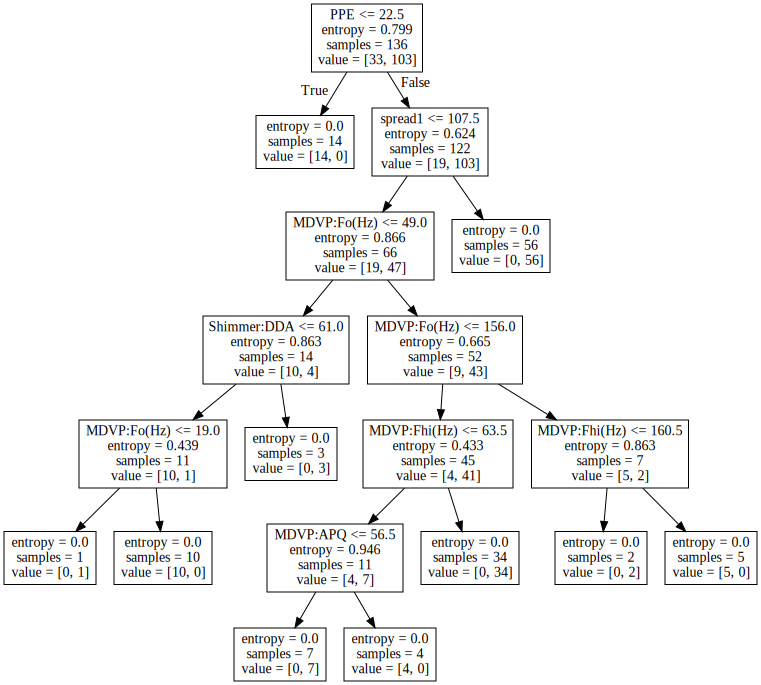

In [33]:
from graphviz import Source
from sklearn import tree

from IPython.display import SVG

graph = Source(tree.export_graphviz(dt_model, out_file=None, feature_names=train_set.columns))
SVG(graph.pipe(format='svg'))

### Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [34]:
#Perform Grid Search Method to find the optimal max_depth size
from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(1,10),'min_samples_leaf':np.arange(1,5)}
GS=GridSearchCV(dt_model,parameter,cv=3,error_score='raise-deprecating')
GS.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
GS.best_params_

{'max_depth': 4, 'min_samples_leaf': 3}

In [36]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 4, random_state=42)
#dt_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf = 4, random_state=42)

model = dt_model2
predictor_var = train_set
outcome_var = train_labels


In [37]:
classification_model(model,predictor_var,outcome_var)

('Accuracy : 96.324%', 'Cross-Validation Score : 89.683%')


In [38]:
y_pred=dt_model2.predict(test_set)   # performance on test data
acc=metrics.accuracy_score(test_labels,y_pred)
print(acc)

# Observation:

# the accuracy increases when the min_samples_leaf is increased and max-depth is reduced 
# but it does not go beyond that of the unregularized tree and the Cross-Validation Score is greatly reduced 
# which indicates less generalization which is not good to predict data in Production
# max_depth=3, min_samples_leaf=30, accuracy=89.83% (same as unregularized tree), CV score=72.83%


# the accuracy decreases when the min_samples_leaf is decreased and the max-depth is increased but this results in an
# increase of the Cross-Validation Score which is a very good thing as it shows that the model is generalizing well
# and becomes stronger to predict data in Production
# max-depth=7, min_samples_leaf=4, accuracy=86.44% (less than unregularized tree), CV score=89.683% (on train set)
# max-depth=8, min_samples_leaf=3, accuracy= 89.83% (same as unregularized tree), CV score=88.228% (on train set)

0.864406779661017


In [39]:
cm=metrics.confusion_matrix(test_labels,y_pred)
print(cm)

[[11  4]
 [ 4 40]]


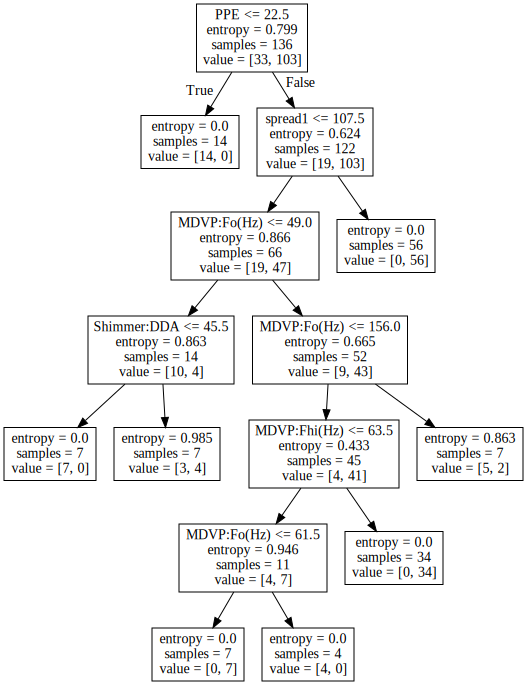

In [40]:
from graphviz import Source
from sklearn import tree

from IPython.display import SVG

graph = Source(tree.export_graphviz(dt_model2, out_file=None, feature_names=train_set.columns))
SVG(graph.pipe(format='svg'))

### Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [41]:
#Perform Grid Search Method to find the optimal max_depth size
from sklearn.model_selection import GridSearchCV
parameter={'n_estimators':np.arange(1,50),'max_depth':np.arange(1,30)}
GS=GridSearchCV(RandomForestClassifier(criterion='entropy',random_state=42),parameter,cv=10,refit=True)
GS.fit(X,y)

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [42]:
GS.best_params_

{'max_depth': 6, 'n_estimators': 48}

In [43]:
# Random forest (Bootstrapped sampled multiple decision tree)
Rf_model = RandomForestClassifier(n_estimators=48,criterion='entropy',max_depth=6,random_state=42) 
#Rf_model = RandomForestClassifier(n_estimators=48,criterion='entropy',max_depth=6,random_state=42) 
model = Rf_model
predictor_var = train_set
outcome_var = train_labels

In [44]:
#Rf_model.fit(train_set, train_labels)
classification_model(model,predictor_var,outcome_var)

('Accuracy : 100.000%', 'Cross-Validation Score : 91.905%')


In [45]:
y_pred=Rf_model.predict(test_set)   # performance on test data
acc=metrics.accuracy_score(test_labels,y_pred)
print(acc)

# Observation:

# 48 trees give the best result, both in terms of CV score and accuracy

0.9491525423728814


### KFold Cross Validation

In [46]:
models = []
models.append(('DecisionTree', dt_model))
models.append(('Regularization', dt_model2))
models.append(('RandomForest', Rf_model))

DecisionTree: 0.862051 (0.057310)
Regularization: 0.862564 (0.056587)
RandomForest: 0.904103 (0.049137)


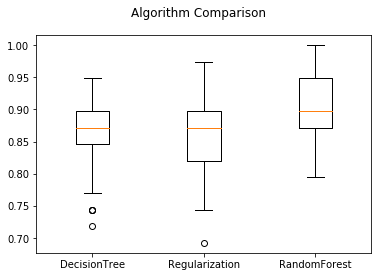

In [47]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.RepeatedKFold(n_splits=5,n_repeats=10,random_state=42)
#	kfold = model_selection.KFold(n_splits=5,random_state=1)
	cv_results = model_selection.cross_val_score(model, X_std, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [48]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(base_estimator=dt_model,n_estimators= 51)
abcl.fit(train_set,train_labels)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=51, random_state=None)

In [49]:
y_pred_boost = abcl.predict(test_set)
metrics.accuracy_score(test_labels,y_pred_boost)

0.8983050847457628

In [50]:
from sklearn.ensemble import BaggingClassifier
#Default base estimator is Decision Tree (CART)

bgcl = BaggingClassifier(base_estimator=dt_model,n_estimators=51,oob_score=True)
bgcl.fit(train_set,train_labels)
#bgcl.oob_score_     ### testing the ensemble against OOB
#bgcl.score(test_set , test_labels) # use this if you have reserved any dataset for testing

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [51]:
bgcl.oob_score_

0.8897058823529411

In [52]:
#In production any unseen new snapshot of data can be used for testing 
production_pred = bgcl.predict(test_set)
metrics.accuracy_score(test_labels,production_pred)

0.8813559322033898

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(train_set,train_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [54]:
y_predict=gbcl.predict(test_set)
metrics.accuracy_score(test_labels,y_predict)

0.9152542372881356

In [55]:
dtcl = DecisionTreeClassifier(criterion = 'entropy')
rfcl = RandomForestClassifier(random_state=0)
abcl = AdaBoostClassifier(base_estimator=dt_model,n_estimators= 51)
bgcl = BaggingClassifier(base_estimator=dt_model,n_estimators=51,oob_score=True)
gbcl = GradientBoostingClassifier(n_estimators = 51)

enclf = VotingClassifier(estimators = [('dt', dtcl), ('rf', rfcl), ('ab', abcl), ('bg', bgcl), ('gb, gbcl')], 
                         voting = 'hard')

In [56]:
for clf, label in zip([dtcl , rfcl, abcl, bgcl, gbcl], ['DecisionTree', 'RandomForest', 'AdaBoost', 'Bagging',
                                                        'Gradient']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

Accuracy: 0.77 (+/- 0.09) [DecisionTree]


C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 i

Accuracy: 0.79 (+/- 0.07) [RandomForest]
Accuracy: 0.72 (+/- 0.08) [AdaBoost]
Accuracy: 0.80 (+/- 0.07) [Bagging]
Accuracy: 0.78 (+/- 0.08) [Gradient]


## ------- Using Principal Component Analysis to compute performance of the models -------

In [57]:
#utilizing PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [58]:
pca.fit(train_set)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [60]:
pca.n_components_ 
# number of attributes reduced from 23 to 8

8

In [61]:
train_set = pca.transform(train_set)
test_set = pca.transform(test_set)

### Create the model using “entropy” method of reducing the entropy and fit it to training data

In [62]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
model = dt_model
predictor_var = train_set
outcome_var = train_labels

In [63]:
classification_model(model,predictor_var,outcome_var)

# Observation:

# this tree model is highly overfitted on the training sample so we have to insure that the regularization helps
# in the increase of the Cross-Validation Score in order to achieve generalization

('Accuracy : 100.000%', 'Cross-Validation Score : 82.354%')


### Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab

In [64]:
y_pred=dt_model.predict(test_set)   # performance on test data
acc=metrics.accuracy_score(test_labels,y_pred)
print(acc)

0.847457627118644


In [65]:
cm=metrics.confusion_matrix(test_labels,y_pred)
print(cm)

[[ 9  6]
 [ 3 41]]


In [66]:
pd.crosstab(y_pred, test_labels, margins=True)

status,0,1,All
row_0,,,
0,9,3,12
1,6,41,47
All,15,44,59


### Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [67]:
#Perform Grid Search Method to find the optimal max_depth size
from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(1,10),'min_samples_leaf':np.arange(1,12)}
GS=GridSearchCV(dt_model,parameter,cv=5,error_score='raise-deprecating')
GS.fit(X,y)

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
GS.best_params_

{'max_depth': 3, 'min_samples_leaf': 11}

In [69]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 10, random_state=42)
#dt_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 10, random_state=42)

model = dt_model2
predictor_var = train_set
outcome_var = train_labels


In [70]:
classification_model(model,predictor_var,outcome_var)

('Accuracy : 91.912%', 'Cross-Validation Score : 86.005%')


In [71]:
y_pred=dt_model2.predict(test_set)   # performance on test data
acc=metrics.accuracy_score(test_labels,y_pred)
print(acc)

# Observation:

# the accuracy increases when the min_samples_leaf is increased and max-depth is reduced 
# but it does not go beyond that of the unregularized tree and the Cross-Validation Score is greatly reduced 
# which indicates less generalization which is not good to predict data in Production


# the accuracy decreases when the min_samples_leaf is decreased and the max-depth is increased but this results in an
# increase of the Cross-Validation Score which is a very good thing as it shows that the model is generalizing well
# and becomes stronger to predict data in Production


0.8135593220338984


In [72]:
cm=metrics.confusion_matrix(test_labels,y_pred)
print(cm)

[[ 9  6]
 [ 5 39]]


### Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [73]:
#Perform Grid Search Method to find the optimal max_depth size
from sklearn.model_selection import GridSearchCV
parameter={'n_estimators':np.arange(1,50),'max_depth':np.arange(1,30)}
GS=GridSearchCV(RandomForestClassifier(criterion='entropy',random_state=42),parameter,cv=10,refit=True)
GS.fit(X,y)

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [74]:
GS.best_params_

{'max_depth': 6, 'n_estimators': 48}

In [75]:
# Random forest (Bootstrapped sampled multiple decision tree)
Rf_model = RandomForestClassifier(n_estimators=48,criterion='entropy',max_depth=12,random_state=42) 
#Rf_model = RandomForestClassifier(n_estimators=48,criterion='entropy',max_depth=12,random_state=42) 
model = Rf_model
predictor_var = train_set
outcome_var = train_labels

In [76]:
#Rf_model.fit(train_set, train_labels)
classification_model(model,predictor_var,outcome_var)

('Accuracy : 100.000%', 'Cross-Validation Score : 88.942%')


In [77]:
y_pred=Rf_model.predict(test_set)   # performance on test data
acc=metrics.accuracy_score(test_labels,y_pred)
print(acc)

# Observation:

# 48 trees give the best result, both in terms of CV score and accuracy

0.8983050847457628


### KFold Cross Validation

In [78]:
models = []
models.append(('DecisionTree', dt_model))
models.append(('Regularization', dt_model2))
models.append(('RandomForest', Rf_model))

DecisionTree: 0.862051 (0.057310)
Regularization: 0.831795 (0.055744)
RandomForest: 0.904615 (0.047844)


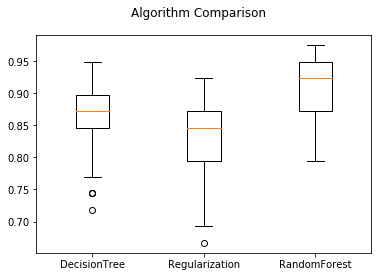

In [79]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.RepeatedKFold(n_splits=5,n_repeats=10,random_state=42)
#	kfold = model_selection.KFold(n_splits=5,random_state=1)
	cv_results = model_selection.cross_val_score(model, X_std, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [80]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(base_estimator=dt_model,n_estimators= 51)
abcl.fit(train_set,train_labels)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=51, random_state=None)

In [81]:
y_pred_boost = abcl.predict(test_set)
metrics.accuracy_score(test_labels,y_pred_boost)

0.8305084745762712

In [82]:
from sklearn.ensemble import BaggingClassifier
#Default base estimator is Decision Tree (CART)

bgcl = BaggingClassifier(base_estimator=dt_model,n_estimators=51,oob_score=True)
bgcl.fit(train_set,train_labels)
#bgcl.oob_score_     ### testing the ensemble against OOB
#bgcl.score(test_set , test_labels) # use this if you have reserved any dataset for testing

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [83]:
bgcl.oob_score_

0.8382352941176471

In [84]:
#In production any unseen new snapshot of data can be used for testing 
production_pred = bgcl.predict(test_set)
metrics.accuracy_score(test_labels,production_pred)

0.864406779661017

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(train_set,train_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [86]:
y_predict=gbcl.predict(test_set)
metrics.accuracy_score(test_labels,y_predict)

0.8983050847457628

In [87]:
dtcl = DecisionTreeClassifier(criterion = 'entropy')
rfcl = RandomForestClassifier(random_state=0)
abcl = AdaBoostClassifier(base_estimator=dt_model,n_estimators= 51)
bgcl = BaggingClassifier(base_estimator=dt_model,n_estimators=51,oob_score=True)
gbcl = GradientBoostingClassifier(n_estimators = 51)

enclf = VotingClassifier(estimators = [('dt', dtcl), ('rf', rfcl), ('ab', abcl), ('bg', bgcl), ('gb, gbcl')], 
                         voting = 'hard')

In [88]:
for clf, label in zip([dtcl , rfcl, abcl, bgcl, gbcl], ['DecisionTree', 'RandomForest', 'AdaBoost', 'Bagging',
                                                        'Gradient']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

Accuracy: 0.75 (+/- 0.06) [DecisionTree]


C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 i

Accuracy: 0.79 (+/- 0.07) [RandomForest]
Accuracy: 0.74 (+/- 0.06) [AdaBoost]
Accuracy: 0.79 (+/- 0.06) [Bagging]
Accuracy: 0.78 (+/- 0.08) [Gradient]
